
# Prospecção de Dados - Data Mining - DI/FCUL 2022/2023

## Lab class TP04b

# Semi Supervised Learning (part II)

*A Semi Supervised Learning Tutorial by Andre Falcao and Sara Madeira (DI/FCUL 2021-2023)*

### Summary

1. Using MlExtend for Mining frequent itemsets

### 0. Getting Started

In this notebook, we use Python 3, Jupyter Notebook and MLxtend. [MLxtend](http://rasbt.github.io/mlxtend/) (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks developed by Sebastian Raschka, which uses Pandas, NumPy, Scikit-learn, Matplotlib and SciPy.

In the lab and at home you should have the latest version of Anaconda, which already installs Python 3, Jupyter, Scikit-learn, Pandas, NumPy, Scikit-learn, Matplotlib and SciPy.


MLxtend is supported in Anaconda (https://anaconda.org/conda-forge/mlxtend). To install this package with conda, run the following in command line and execute the following command:

`conda install -c conda-forge mlxtend`

After this you should be ready to start.


## 1. Frequent Pattern Mining and Association Rule Mining in MLxtend

In this section we follow closely the examples on generating frequent Itemsets via Apriori Algorithm and Association Rules Generation from Frequent Itemsets provided in the documentation of MLxtend by Sebastian Raschka.

### 1.1. Preprocess Dataset

Consider the previous example of a set of transactions (baskets) containing a set products (items) bought at a given supermarket.


In [1]:
# Transaction data (market baskets)
transactions = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
transactions

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

Note that here we are not so concerned with representation as we are going to use an external library to process that information in new data structure.

The mlextend library understands transactions represented as list of lists and contructs a special array to process it.
We also are going to use pandas to have a novel look at our data

In [2]:
import pandas as pd
from mlxtend.preprocessing import  TransactionEncoder

The Apriori implementation at MLxtend receives a binary database, thus the first step is to transform the transactions database into a binary database as an array, where each line iis a transaction, each column j is an item (product) and 1 means at position ij means item j appears at transaction i.

In [3]:
#Compute binary database
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(transactions).transform(transactions)
binary_database = pd.DataFrame(trans_array, columns=tr_enc.columns_)
binary_database

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


### 1.2. Compute Frequent Itemsets using Apriori

We can now input the binary database to apriori and compute frequent itemsets. Consider a minimum support of 60%, which in this case means an item is frequent if it appears in at least 3 transactions.

In [4]:
from mlxtend.frequent_patterns import apriori

In [5]:
frequent_itemsets = apriori(binary_database, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


By default, apriori returns the column indexes of the items, which may be useful in downstream operations, such as association rule mining. For better readability, we can set use_colnames=True to convert these integer values into the respective item names.

The advantage of working with pandas DataFrames is that we can use its convenient features to filter the results. For instance, let us assume we decide that after all we are only interested in itemsets of length 2 that have a support of at least 80 percent. Given that we already have the frequent itemsets and their support, we can add a new column that stores the length of each itemset:

In [6]:
#Compute itemsets with min_support = 60% with item names
frequent_itemsets = apriori(binary_database, min_support=0.6, use_colnames=True)
# Add new column length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Kidney Beans, Milk)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Kidney Beans, Yogurt)",2


We can now filter the results based on the desired support and pattern length:

In [7]:
# filter using support and pattern length

frequent_itemsets = frequent_itemsets[ (frequent_itemsets['support'] >= 0.8) & (frequent_itemsets['length'] == 2)]
frequent_itemsets


,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


#### Exercise

* if we already knew that we were only intested in patterns with at least 80% support it was more efficient to run the Apriori algorithm already with this minimum support value and then filter the results based only on pattern length. **Can you do this ?**


In [9]:
#Solution
min_sup = 0.8
l = 1
frequent_itemsets = apriori(binary_database, min_support=min_sup, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets[ frequent_itemsets.length > l ]

,support,itemsets,length
2,0.8,"(Eggs, Kidney Beans)",2



### 1.3. Generate Association Rules from Frequent Itemsets

The first step in association rule mining is to find the frequent itemsets. In this context, we can now generate association rules from the frequent itemsets first discovered using Apriori. In what follows, we follow closely the examples in Association Rules Generation from Frequent Itemsets.

The method generate_rules takes dataframes of frequent itemsets as produced by the apriori function in mlxtend.association. To demonstrate the usage of generate_rules, we first create a pandas DataFrame of frequent itemsets as generated by the apriori function.

The generate_rules function allows you to: 1) specify your metric of interest and (2) - specify the according threshold. Currently implemented measures are confidence and lift.

Consider we are interesting in rules derived from the frequent itemsets only if the level of confidence is above the 90 percent threshold (min_threshold=0.9):


In [10]:
#first retrieve the original itemsets with 60% support
frequent_itemsets = apriori(binary_database, min_support=0.6, use_colnames=True)

In [11]:
from mlxtend.frequent_patterns import association_rules
# Generate association rules with confidence >= 60%

all_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
all_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Kidney Beans),(Milk),1.0,0.6,0.6,0.60,1.00,0.00,1.0
5,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0
7,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0
9,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf


if we are interested in rules fulfilling a different interest metric, we can simply adjust the parameters. For example, in case we are only interested in rules that have a lift score of >= 1.2, we would do the following:

In [12]:
# Generate association rules with lift >= 1.2
good_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
good_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
5,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf


If, on the other hand, we are interested in rules with confidence above 90% and lift >= 1.2, we can generate the rules using the confidence as metric and then filter using the lift, or vice versa:

In [18]:
# Generate association rules with confidence >= 90%
all_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
# Filter association rules using lift
new_rules = all_rules[all_rules['lift'] >= 1.2]
new_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
6,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
7,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


#### Exercises


How would you list the patterns that have a given minimum confidence but have a specific consequent or antecedent. Eg:
* (Onion) => X
* X => (Eggs, Kidney Beans) 	




In [19]:
#first step
all_rules.values[:3]

array([[frozenset({'Eggs'}), frozenset({'Kidney Beans'}), 0.8, 1.0, 0.8,
        1.0, 1.0, 0.0, inf],
       [frozenset({'Onion'}), frozenset({'Eggs'}), 0.6, 0.8, 0.6, 1.0,
        1.25, 0.12, inf],
       [frozenset({'Milk'}), frozenset({'Kidney Beans'}), 0.6, 1.0, 0.6,
        1.0, 1.0, 0.0, inf]], dtype=object)

In [23]:
#solution

all_rules[ all_rules.antecedents == frozenset(["Onion"]) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
3,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
7,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


In [24]:
#solution
all_rules[ all_rules.consequents == frozenset(["Eggs", "Kidney Beans"]) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


#### Exercise

Consider the set of transactions below taken from from Han, Kamber and Pei, Chapter 6 and used as example in the theoretical lesson. Create and preprocess the dataset and then use the functions apriori and association_rules to generate, respectively, frequent patterns with different values for minimum support, and association rules with different values for confidence and lift.

* Verify the results from this week's Lecture in the AllElectronics.txt data set
* Check with min_support = 2 and 3
* generate the respective rules with a confidence threshold of 0.8

Use the function below for reading the transactions



In [25]:
def load_transactions (csv_file):
#input: csv file with one transaction per line,
# where transactions may have a different number of items
#    output: matrix where each row is a vector of items (transaction)
    lines = open(csv_file, 'r').readlines()
    transactions_matrix = []
    for l in lines:
        l = l.rstrip('\n')
        transaction = l.split(',')
        if len(transaction)>0: transactions_matrix.append(transaction)
    return transactions_matrix

elecs = load_transactions('AllElectronics.txt')
print("N. of transactions:", len(elecs))
elecs[:10]

N. of transactions: 9


[['I1', 'I2', 'I5'],
 ['I2', 'I4'],
 ['I2', 'I3'],
 ['I1', 'I2', 'I4'],
 ['I1', 'I3'],
 ['I2', 'I3'],
 ['I1', 'I3'],
 ['I1', 'I2', 'I3', 'I5'],
 ['I1', 'I2', 'I3']]

In [35]:
# Compute binary database (transactions X products) - need for Apriori
tr_enc = TransactionEncoder()
elecs_array = tr_enc.fit(elecs).transform(elecs)
elecs_pd = pd.DataFrame(elecs_array, columns=tr_enc.columns_)

elecs_pd
#Compute itemsets with min_support =2
#--> you do it
supports = apriori(elecs_pd, min_support=0.02, use_colnames=True)

In [36]:
###Compute rules
#-> you do it

association_rules(supports)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(I5),(I1),0.222222,0.666667,0.222222,1.0,1.500000,0.074074,inf
1,(I4),(I2),0.222222,0.777778,0.222222,1.0,1.285714,0.049383,inf
2,(I5),(I2),0.222222,0.777778,0.222222,1.0,1.285714,0.049383,inf
3,"(I1, I4)",(I2),0.111111,0.777778,0.111111,1.0,1.285714,0.024691,inf
4,"(I2, I5)",(I1),0.222222,0.666667,0.222222,1.0,1.500000,0.074074,inf
5,"(I1, I5)",(I2),0.222222,0.777778,0.222222,1.0,1.285714,0.049383,inf
6,(I5),"(I1, I2)",0.222222,0.444444,0.222222,1.0,2.250000,0.123457,inf
7,"(I3, I5)",(I1),0.111111,0.666667,0.111111,1.0,1.500000,0.037037,inf
8,"(I3, I5)",(I2),0.111111,0.777778,0.111111,1.0,1.285714,0.024691,inf
9,"(I3, I2, I5)",(I1),0.111111,0.666667,0.111111,1.0,1.500000,0.037037,inf



## 2. Market Basket Analysis in a Real Dataset using MLxtend

We will now use the dataset `groceries.csv` containing 9835 transactions (baskets) and 169 items (products) collected from a supermarket and downloaded here.


### 2.1. Preprocess Dataset

Take a look at the dataset by opening the .csv file. We will use the function load_transactions below to load the dataset into the format used in the examples above.


In [37]:
# Load transaction from file groceries.csv
transactions = load_transactions('groceries.csv')
transactions[:10]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals']]

In [38]:
#Check the number of transactions
len(transactions)

9835

In [39]:
# Compute binary database (transactions X products )
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(transactions).transform(transactions)
binary_database = pd.DataFrame(trans_array, columns=tr_enc.columns_)
binary_database

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



### 2.2. Compute Frequent Itemsets

Let us use apriori to compute the frequent itemsets. Note that due to the number of transactions and different items the computations might not be instantaneous as before.


In [40]:
#Compute itemsets min_support = 20%
frequent_itemsets = apriori(binary_database, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.255516,(whole milk)


In [41]:
#Compute itemsets min_support = 10%
# you do it!
frequent_itemsets = apriori(binary_database, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.174377,(soda)
5,0.104931,(tropical fruit)
6,0.255516,(whole milk)
7,0.139502,(yogurt)


In [42]:
#Compute itemsets min_support = 5%
# you do it!
frequent_itemsets = apriori(binary_database, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [43]:
#Compute itemsets min_support = 1%
frequent_itemsets = apriori(binary_database, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)"
329,0.014540,"(root vegetables, whole milk, yogurt)"
330,0.010473,"(yogurt, soda, whole milk)"
331,0.015150,"(tropical fruit, whole milk, yogurt)"


In [44]:
# add new column length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets

,support,itemsets,length
0,0.033452,(UHT-milk),1
1,0.017692,(baking powder),1
2,0.052466,(beef),1
3,0.033249,(berries),1
4,0.026029,(beverages),1
...,...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)",3
329,0.014540,"(root vegetables, whole milk, yogurt)",3
330,0.010473,"(yogurt, soda, whole milk)",3
331,0.015150,"(tropical fruit, whole milk, yogurt)",3


In [45]:
# filter using pattern length = 2
frequent_2_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
frequent_2_itemsets

,support,itemsets,length
88,0.019725,"(beef, other vegetables)",2
89,0.013625,"(rolls/buns, beef)",2
90,0.017387,"(root vegetables, beef)",2
91,0.021251,"(beef, whole milk)",2
92,0.011693,"(yogurt, beef)",2
...,...,...,...
296,0.012710,"(whole milk, waffles)",2
297,0.032232,"(whole milk, whipped/sour cream)",2
298,0.020742,"(yogurt, whipped/sour cream)",2
299,0.017082,"(white bread, whole milk)",2


In [46]:
# filter using pattern length = 3
frequent_3_itemsets = frequent_itemsets[frequent_itemsets['length'] == 3]
frequent_3_itemsets

,support,itemsets,length
301,0.010778,"(other vegetables, whole milk, bottled water)",3
302,0.011490,"(other vegetables, butter, whole milk)",3
303,0.010371,"(root vegetables, other vegetables, citrus fruit)",3
304,0.013015,"(whole milk, other vegetables, citrus fruit)",3
305,0.010269,"(yogurt, whole milk, citrus fruit)",3
306,0.010066,"(yogurt, whole milk, curd)",3
307,0.012303,"(other vegetables, domestic eggs, whole milk)",3
308,0.010473,"(other vegetables, fruit/vegetable juice, whol...",3
309,0.010574,"(pastry, other vegetables, whole milk)",3
310,0.013523,"(other vegetables, pip fruit, whole milk)",3


### 2.2. Generate Association Rules from Frequent Itemsets

In [47]:
#Compute itemsets min_support = 1%
frequent_itemsets = apriori(binary_database, min_support=0.01, use_colnames=True)
print(len(frequent_itemsets))
# Compute association rules with 80% confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
pd.options.display.max_rows=10
rules

333


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
1,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
2,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
4,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003
...,...,...,...,...,...,...,...,...,...
10,"(root vegetables, rolls/buns)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
11,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
12,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
13,"(tropical fruit, yogurt)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,0.007668,1.542528



## 3. Self Experiences with Frequent Pattern Mining and Association Rule Mining in other Real Problems and Datasets

A surprising insight is that supervised classification problems can be encoded as Association Rule Mining problems, by limiting the consequent to the dependent variable.  As a simple example experiment with the familiar Tennis Dataset used for Decision Tree Learning


In [71]:
df=pd.read_csv("tennis.txt", sep="\t")
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
...,...,...,...,...,...,...
9,D10,Rain,Mild,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes


In [72]:
del df["day"]
df2 = df.copy()
cols=df2.columns
for col in cols:
    df2[col]=col+"="+df2[col]

In [73]:
tennis=[list(line) for line in df2.values]
tennis

[['outlook=Sunny', 'temp=Hot', 'humidity=High', 'wind=Weak', 'play=No'],
 ['outlook=Sunny', 'temp=Hot', 'humidity=High', 'wind=Strong', 'play=No'],
 ['outlook=Overcast', 'temp=Hot', 'humidity=High', 'wind=Weak', 'play=Yes'],
 ['outlook=Rain', 'temp=Mild', 'humidity=High', 'wind=Weak', 'play=Yes'],
 ['outlook=Rain', 'temp=Cool', 'humidity=Normal', 'wind=Weak', 'play=Yes'],
 ['outlook=Rain', 'temp=Cool', 'humidity=Normal', 'wind=Strong', 'play=No'],
 ['outlook=Overcast',
  'temp=Cool',
  'humidity=Normal',
  'wind=Strong',
  'play=Yes'],
 ['outlook=Sunny', 'temp=Mild', 'humidity=High', 'wind=Weak', 'play=No'],
 ['outlook=Sunny', 'temp=Cool', 'humidity=Normal', 'wind=Weak', 'play=Yes'],
 ['outlook=Rain', 'temp=Mild', 'humidity=Normal', 'wind=Weak', 'play=Yes'],
 ['outlook=Sunny', 'temp=Mild', 'humidity=Normal', 'wind=Strong', 'play=Yes'],
 ['outlook=Overcast', 'temp=Mild', 'humidity=High', 'wind=Strong', 'play=Yes'],
 ['outlook=Overcast', 'temp=Hot', 'humidity=Normal', 'wind=Weak', 'play=

In [74]:
tr_enc = TransactionEncoder()
tennis_array = tr_enc.fit(tennis).transform(tennis)
binary_database = pd.DataFrame(tennis_array, columns=tr_enc.columns_)
binary_database

,humidity=High,humidity=Normal,outlook=Overcast,outlook=Rain,outlook=Sunny,play=No,play=Yes,temp=Cool,temp=Hot,temp=Mild,wind=Strong,wind=Weak
0,True,False,False,False,True,True,False,False,True,False,False,True
1,True,False,False,False,True,True,False,False,True,False,True,False
2,True,False,True,False,False,False,True,False,True,False,False,True
3,True,False,False,True,False,False,True,False,False,True,False,True
4,False,True,False,True,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9,False,True,False,True,False,False,True,False,False,True,False,True
10,False,True,False,False,True,False,True,False,False,True,True,False
11,True,False,True,False,False,False,True,False,False,True,True,False
12,False,True,True,False,False,False,True,False,True,False,False,True


In [75]:
#Compute itemsets min_support = 20%
frequent_itemsets = apriori(binary_database, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules[rules["consequents"]==frozenset({'play=Yes'})]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(humidity=Normal),(play=Yes),0.500000,0.642857,0.428571,0.857143,1.333333,0.107143,2.500000
17,(outlook=Overcast),(play=Yes),0.285714,0.642857,0.285714,1.000000,1.555556,0.102041,inf
18,(outlook=Rain),(play=Yes),0.357143,0.642857,0.214286,0.600000,0.933333,-0.015306,0.892857
27,(temp=Cool),(play=Yes),0.285714,0.642857,0.214286,0.750000,1.166667,0.030612,1.428571
28,(temp=Mild),(play=Yes),0.428571,0.642857,0.285714,0.666667,1.037037,0.010204,1.071429
29,(wind=Strong),(play=Yes),0.428571,0.642857,0.214286,0.500000,0.777778,-0.061224,0.714286
30,(wind=Weak),(play=Yes),0.571429,0.642857,0.428571,0.750000,1.166667,0.061224,1.428571
41,"(temp=Cool, humidity=Normal)",(play=Yes),0.285714,0.642857,0.214286,0.750000,1.166667,0.030612,1.428571
47,"(humidity=Normal, wind=Weak)",(play=Yes),0.285714,0.642857,0.285714,1.000000,1.555556,0.102041,inf
50,"(outlook=Rain, wind=Weak)",(play=Yes),0.214286,0.642857,0.214286,1.000000,1.555556,0.076531,inf


#### Exercises

1. Compare the above approach to the results you get out of a Decision Tree
    * In terms of the efficiency to make a model
    * in terms of its usage in a real world situation
    * in terms of explainability
2. Can the above approach for supervised modelling find relations that decision trees would not find? Discuss your answer



In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [103]:
X = df.drop(columns="play")
encs = []
for col in X:
    encs.append(LabelEncoder().fit(X[col]))
    X[col] = encs[-1].transform(X[col])
y = LabelEncoder().fit_transform(df.play)

In [111]:
X.columns

Index(['outlook', 'temp', 'humidity', 'wind'], dtype='object')

In [120]:
i=0
print(encs[i].classes_,
encs[i].transform(encs[i].classes_),
     sep="\n")

['Overcast' 'Rain' 'Sunny']
[0 1 2]


In [119]:
i=2
print(encs[i].classes_,
encs[i].transform(encs[i].classes_),
     sep="\n")

['High' 'Normal']
[0 1]


In [118]:
i=3
print(encs[i].classes_,
encs[i].transform(encs[i].classes_),
     sep="\n")

['Strong' 'Weak']
[0 1]


In [104]:
dtc = DecisionTreeClassifier().fit(X, y)

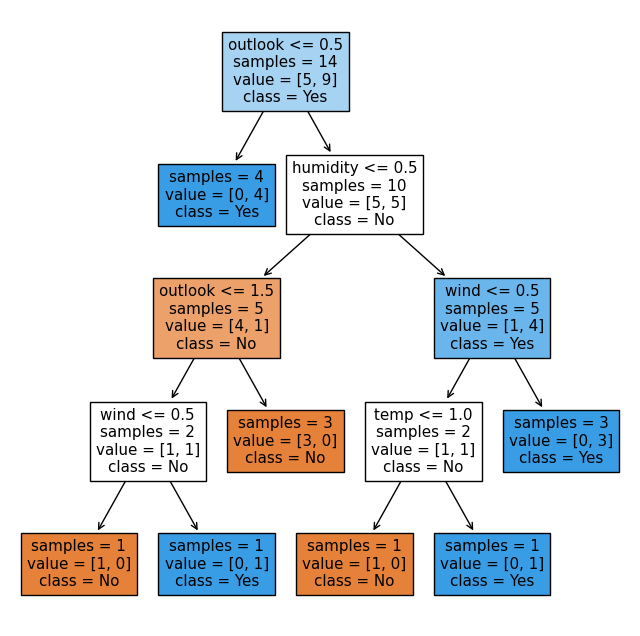

In [110]:
plt.figure(figsize=(8,8))
plot_tree(dtc, impurity=False, feature_names=X.columns,filled=True, class_names=["No", "Yes"]);